<h1>Crypto Market Simulator</h1>

In [16]:
import asyncio
import ujson
import time
import pandas as pd
from tqdm import tqdm

from gate_ws import Configuration, Connection, WebSocketResponse
from gate_ws.spot import SpotPublicTradeChannel, SpotOrderBookChannel, SpotOrderBookUpdateChannel

In [ ]:
# NUM_OF_SNAPSHOTS = 10
# curr_snapshot = 0
# orders = []

<h2>Function to get orderbook data in json format</h2>

In [ ]:
# # define your callback function on message received
# def print_message(conn: Connection, response: WebSocketResponse):
#     global curr_snapshot
#     global NUM_OF_SNAPSHOTS
#     global orders
#     if response.error:
#         print('error returned: ', response.error)
#         conn.close()
#         return
    
#     data = response.result
#     print(f'{curr_snapshot} / {NUM_OF_SNAPSHOTS}')
#     if list(data.keys())[0] != "status":
#         orders.append(data)
#         curr_snapshot += 1
    
#     if curr_snapshot >= NUM_OF_SNAPSHOTS:
#         conn.close()
#         return
        
# async def main():
#     channel_name = "BTC_USD"
#     depth = "20"
#     update_rate = "100ms"
    
#     filename = "orderbook.json"
    
#     conn = Connection(Configuration())

#     channel = SpotOrderBookChannel(conn, print_message)
    
    
#     channel.subscribe([channel_name, depth, update_rate])

#     # start the client
#     await conn.run()
    
#     with open(filename, "w") as file:
#         data = ujson.dumps(orders, indent=4)
#         print(data)
#         file.write(data)

# if __name__ == '__main__':
#     start_time = time.perf_counter()
#     await main()
#     end_time = time.perf_counter()
#     print(f"Time: {end_time - start_time}")

In [ ]:
# df = pd.read_json("orderbook.json")
# df.head()

In [17]:
df_final = pd.read_csv("orderbook.csv", index_col = [0])
df_final.head()

,timestamp,market_id,market,symbol,ask_0_px,ask_1_px,ask_2_px,ask_3_px,ask_4_px,ask_5_px,...,bid_11_qty,bid_12_qty,bid_13_qty,bid_14_qty,bid_15_qty,bid_16_qty,bid_17_qty,bid_18_qty,bid_19_qty,date
0,1.681261e+12,1,GT-YFII-USDT-SPOT,YFII-USDT,1117.64,1117.65,1117.68,1118.47,1119.02,1120.02,...,0.5651,0.4171,0.9354,0.0011,0.1404,0.1015,1.2217,0.0964,0.0012,1
1,1.681261e+12,1,GT-YFII-USDT-SPOT,YFII-USDT,1117.63,1117.64,1117.68,1117.91,1119.02,1120.02,...,0.4171,0.9354,0.0011,0.1404,0.1015,1.2217,0.0964,0.0012,0.1086,1
2,1.681261e+12,1,GT-YFII-USDT-SPOT,YFII-USDT,1117.62,1117.63,1117.64,1117.91,1119.02,1120.02,...,0.4171,0.9354,0.0011,0.1404,1.2217,0.0964,0.0012,0.1086,0.0010,1
3,1.681261e+12,1,GT-YFII-USDT-SPOT,YFII-USDT,1117.62,1117.63,1117.64,1117.91,1119.02,1120.02,...,0.4171,0.9354,0.0011,0.1404,1.2217,0.0964,0.0012,0.1086,0.0010,1
4,1.681261e+12,1,GT-YFII-USDT-SPOT,YFII-USDT,1117.62,1117.63,1117.64,1117.91,1119.02,1120.02,...,0.4171,0.9354,0.0011,0.1404,1.2217,0.0964,0.0012,0.1086,0.0010,1


In [18]:
df_final.drop(columns = ['timestamp', 'market_id', 'market', 'symbol', 'date'], axis=1, inplace = True)

In [19]:
df_final

,ask_0_px,ask_1_px,ask_2_px,ask_3_px,ask_4_px,ask_5_px,ask_6_px,ask_7_px,ask_8_px,ask_9_px,...,bid_10_qty,bid_11_qty,bid_12_qty,bid_13_qty,bid_14_qty,bid_15_qty,bid_16_qty,bid_17_qty,bid_18_qty,bid_19_qty
0,1117.64,1117.65,1117.68,1118.47,1119.02,1120.02,1120.24,1120.25,1120.90,1121.06,...,0.0018,0.5651,0.4171,0.9354,0.0011,0.1404,0.1015,1.2217,0.0964,0.0012
1,1117.63,1117.64,1117.68,1117.91,1119.02,1120.02,1120.24,1120.25,1120.90,1121.06,...,0.5651,0.4171,0.9354,0.0011,0.1404,0.1015,1.2217,0.0964,0.0012,0.1086
2,1117.62,1117.63,1117.64,1117.91,1119.02,1120.02,1120.24,1120.25,1120.80,1120.90,...,0.5651,0.4171,0.9354,0.0011,0.1404,1.2217,0.0964,0.0012,0.1086,0.0010
3,1117.62,1117.63,1117.64,1117.91,1119.02,1120.02,1120.24,1120.25,1120.80,1120.90,...,0.5651,0.4171,0.9354,0.0011,0.1404,1.2217,0.0964,0.0012,0.1086,0.0010
4,1117.62,1117.63,1117.64,1117.91,1119.02,1120.02,1120.24,1120.25,1120.76,1120.80,...,0.5651,0.4171,0.9354,0.0011,0.1404,1.2217,0.0964,0.0012,0.1086,0.0010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22231,1113.10,1113.11,1113.13,1113.19,1113.28,1113.46,1114.32,1115.30,1115.31,1115.77,...,0.0011,0.0012,0.5418,0.4171,0.0097,0.0012,0.8998,0.1876,0.0011,0.0010
22232,1113.10,1113.11,1113.13,1113.19,1113.28,1113.46,1114.32,1115.30,1115.31,1115.77,...,0.0011,0.0012,0.5418,0.4171,0.0097,0.0012,0.8998,0.1876,0.0011,0.0010
22233,1113.10,1113.11,1113.13,1113.19,1113.28,1113.46,1114.32,1115.30,1115.31,1115.77,...,0.0011,0.0012,0.5418,0.4171,0.0097,0.0012,0.8998,0.1876,0.0011,0.0010
22234,1113.10,1113.11,1113.13,1113.19,1113.28,1113.46,1114.32,1115.30,1115.31,1115.77,...,0.0011,0.0012,0.5418,0.4171,0.0097,0.0012,0.8998,0.1876,0.0011,0.0010


In [20]:
# df2 = pd.DataFrame(df)

# df2[[f'bid_{i}' for i in range(20)]] = pd.DataFrame(df2.bids.tolist(), index= df2.index)
# df2[[f'ask_{i}' for i in range(20)]] = pd.DataFrame(df2.asks.tolist(), index= df2.index)

# df2.head()

In [21]:
# for i in range(20):
#     df2[[f'bid_{i}_px', f"bid_{i}_qty"]] = pd.DataFrame(df2[f"bid_{i}"].tolist(), index= df2.index).apply(pd.to_numeric, errors = 'coerce')
#     df2[[f'ask_{i}_px', f"ask_{i}_qty"]] = pd.DataFrame(df2[f"ask_{i}"].tolist(), index= df2.index).apply(pd.to_numeric, errors = 'coerce')
    
# df2.head()

<h2>Final dataframe format</h2>

In [22]:
# #Remove unnecessary columns
# df2.drop(columns = [f'bid_{i}' for i in range(20)]+[f'ask_{i}' for i in range(20)]+["bids","asks", "lastUpdateId"], axis=1, inplace = True)
# df2.drop(columns = ['t', 's'], axis=1, inplace = True)

In [23]:
# df2.head()

In [24]:
def get_features(orderbook_data):
    # Compute the mid price
    mid_price = (orderbook_data['bid_0_px'].iloc[[0]] + orderbook_data['ask_0_px'].iloc[[0]]) / 2
    
    # Compute the spread
    spread = orderbook_data['ask_0_px'].iloc[[0]] - orderbook_data['bid_0_px'].iloc[[0]]
    
    # Compute the best bid-ask imbalance
    total_bid_vol = 0
    total_ask_vol = 0
    for i in range(20):
        total_bid_vol += orderbook_data[f'bid_{i}_qty'].iloc[[0]]
        total_ask_vol += orderbook_data[f'ask_{i}_qty'].iloc[[0]]
    bid_ask_imbalance = (total_bid_vol - total_ask_vol) / (total_bid_vol + total_ask_vol)
    
    # Compute the best bid and ask depth
    best_bid_depth = orderbook_data['bid_0_qty'].iloc[[0]]
    best_ask_depth = orderbook_data['ask_0_qty'].iloc[[0]]
    
    # Compute the price distance of the best bid and ask from the mid price
    bid_price_distance = orderbook_data['bid_0_px'].iloc[[0]] - mid_price
    ask_price_distance = orderbook_data['ask_0_px'].iloc[[0]] - mid_price
    
    # Return a dictionary containing the extracted features
    features = {
        'mid_price': mid_price,
        'spread': spread,
        'bid_ask_imbalance': bid_ask_imbalance,
        'best_bid_depth': best_bid_depth,
        'best_ask_depth': best_ask_depth,
        'bid_price_distance': bid_price_distance,
        'ask_price_distance': ask_price_distance
    }
    
    return features

In [25]:
features = get_features(df_final)
print(list(features.values()))

[0    1116.7
dtype: float64, 0    1.88
dtype: float64, 0   -0.017195
dtype: float64, 0    0.547
Name: bid_0_qty, dtype: float64, 0    0.0042
Name: ask_0_qty, dtype: float64, 0   -0.94
dtype: float64, 0    0.94
dtype: float64]


<h2> Reinforcement Learning Model </h2>

In [26]:
import gymnasium as gym
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [35]:
class CryptoOrderEnv(gym.Env):
    def __init__(self, orderbook_df):
        # Load the order book DataFrame
        self.orderbook_df = orderbook_df

        # Define the action space (buy or hold)
        self.action_space = gym.spaces.Discrete(2)

        # Define the observation space
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(7,))

        # Initialize the state
        self.reset()

    def reset(self):
        # Set the initial state to the first row of the order book DataFrame
        self.current_row = 0
#         print(self.orderbook_df.iloc[:1])
        temp = get_features(self.orderbook_df.iloc[[self.current_row]])
        self.current_state = np.array(list(temp.values()))
        print(self.current_state)
        self.current_profit = 0

        return self.current_state

    def step(self, action):
        
        # Place an order based on the action
        if action == 0:  # Sell
            # Place a market buy order at the best ask price
            price = self.orderbook_df['bid_0_px'].iloc[self.current_row]
            quantity = 1
            self.current_profit += price * quantity

        elif action == 1:  # Hold
            price = 0
            quantity = 0
        
        else:
            print("Invalid action")

        # Move to the next row of the order book DataFrame
        self.current_row += 100

        # Calculate the reward as the change in profit
        mid_price = (self.orderbook_df['bid_0_px'].iloc[self.current_row] + self.orderbook_df['ask_0_px'].iloc[self.current_row]) / 2
#         reward = (self.current_profit - mid_price) / spread
        reward = float(self.orderbook_df['bid_0_px'].iloc[self.current_row-100] - self.orderbook_df['bid_0_px'].iloc[self.current_row])
    
        if action == 1: 
            reward = 0

        # Update the state
#         self.current_state = self.orderbook_df.iloc[self.current_row].values
        temp1 = get_features(self.orderbook_df.iloc[[self.current_row]])
        self.current_state = np.array(list(temp1.values()))

        # Determine if the episode is done
#         done = self.current_row >= len(self.orderbook_df) - 1
        done = self.current_row >= 10000
#         print(done)

        return self.current_state, reward, done, {'price': price, 'quantity': quantity}
    
df = df_final
env_name = 'CryptoOrderEnv'
gym.register(env_name, entry_point=CryptoOrderEnv, kwargs={'orderbook_df': df})

In [39]:
# Define the RL environment
env = gym.make(env_name)

# Define the neural network architecture
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, input_dim=env.observation_space.shape[0], activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(env.action_space.n, activation='linear')
    ])
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())
    return model

# Define the RL agent
class DQNAgent:
    def __init__(self, env):
        self.env = env
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.batch_size = 16
        self.model = create_model()
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return self.env.action_space.sample()
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])
    
    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        memory = [(state, action, reward, next_state, done) for state, action, reward, next_state, done in self.memory]
        minibatch = np.array(memory, dtype=object)[np.random.choice(len(memory), self.batch_size, replace=False)]
        
#         states, actions, rewards, next_states, dones = zip(*minibatch)
#         dones = np.vstack(dones)
#         states = np.array(states)
#         next_states = np.array(next_states)
#         targets = self.model.predict(states)
#         q_values = self.model.predict(next_states)
#         max_q_values = np.amax(q_values, axis=1)
#         dones = dones.reshape((-1, 1)) # Reshape dones to (batch_size, 1)

#         # Create a mask to select the Q-value for the action that was taken
#         mask = np.zeros((self.batch_size, self.env.action_space.n))
#         mask[np.arange(self.batch_size), actions] = 1

#         # Set all other Q-values to zero
#         masked_q_values = q_values * mask
        
#         targets[np.arange(self.batch_size), actions] = rewards + (self.gamma * max_q_values * ~dones)
#         self.model.fit(states, targets, epochs=1, verbose=0)
#         if self.epsilon > self.epsilon_min:
#             self.epsilon *= self.epsilon_decay
        
        states = np.vstack(minibatch[:, 0])
        actions = np.squeeze(minibatch[:, 1]).astype(int)
        rewards = minibatch[:, 2]
        next_states = np.vstack(minibatch[:, 3])
        dones = minibatch[:, 4]
        
        print(rewards)

        targets = self.model.predict(states)
        q_values = self.model.predict(next_states)
        max_q_values = np.amax(q_values, axis=1)
        dones = dones.reshape((-1, 1)) # Reshape dones to (batch_size, 1)

        # Create a mask to select the Q-value for the action that was taken
        mask = np.zeros((self.batch_size, self.env.action_space.n))
        mask[np.arange(self.batch_size), actions] = 1

        # Set all other Q-values to zero
        masked_q_values = q_values * mask

        targets = rewards + self.gamma * np.max(masked_q_values, axis=1) * (1 - dones.ravel())
        targets_full = self.model.predict(states)
        targets_full[np.arange(self.batch_size), actions] = targets
        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        
rewards = []
actions = []
        
# Define the RL training process
def train_dqn(agent, episodes):
    for episode in tqdm(range(episodes)):
        state = env.reset()
        state = np.reshape(state, [1, env.observation_space.shape[0]])
        done = False
        i = 0
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, env.observation_space.shape[0]])
            agent.remember(state, action, reward, next_state, done)
            actions.append(action)
            rewards.append(reward)
            state = next_state
            i += 1
            if i > 10000: # Exit episode after 10000 steps to avoid getting stuck
                break
                
        print(f"action: {action}")
        print(f"reward: {reward}")
        
        print("Episode {}: Score = {}, Epsilon = {}".format(episode, reward, agent.epsilon))
        agent.replay()
    
    return agent

# Train the RL agent
agent = DQNAgent(env)
agent = train_dqn(agent, 5)

[[ 1.11670000e+03]
 [ 1.88000000e+00]
 [-1.71953976e-02]
 [ 5.47000000e-01]
 [ 4.20000000e-03]
 [-9.40000000e-01]
 [ 9.40000000e-01]]


  0%|          | 0/5 [00:00<?, ?it/s]

[[ 1.11670000e+03]
 [ 1.88000000e+00]
 [-1.71953976e-02]
 [ 5.47000000e-01]
 [ 4.20000000e-03]
 [-9.40000000e-01]
 [ 9.40000000e-01]]
action: 0
reward: 0.01999999999998181
Episode 0: Score = 0.01999999999998181, Epsilon = 1.0
[-0.06999999999993634 0 0 0 0 0 0.0 0.0 -0.07000000000016371
 -0.06999999999993634 0 -0.09000000000014552 -0.01999999999998181 0 0.0 0]


 20%|██        | 1/5 [00:02<00:08,  2.15s/it]

[[ 1.11670000e+03]
 [ 1.88000000e+00]
 [-1.71953976e-02]
 [ 5.47000000e-01]
 [ 4.20000000e-03]
 [-9.40000000e-01]
 [ 9.40000000e-01]]


 40%|████      | 2/5 [00:04<00:06,  2.04s/it]

action: 1
reward: 0
Episode 1: Score = 0, Epsilon = 0.995
[0.0 0.06999999999993634 0 -0.08000000000015461 -0.05999999999994543 0 0.0
 -0.05999999999994543 0 -0.009999999999990905 -0.07999999999992724
 -0.029999999999972715 0.06999999999993634 -0.08000000000015461
 0.16000000000008185 0]
[[ 1.11670000e+03]
 [ 1.88000000e+00]
 [-1.71953976e-02]
 [ 5.47000000e-01]
 [ 4.20000000e-03]
 [-9.40000000e-01]
 [ 9.40000000e-01]]


 60%|██████    | 3/5 [00:06<00:04,  2.03s/it]

action: 0
reward: 0.01999999999998181
Episode 2: Score = 0.01999999999998181, Epsilon = 0.990025
[0 0 0.7400000000000091 0 0 0.05999999999994543 0.0 0.16000000000008185 0
 0.0 0.0 0.0 0 0 -0.17000000000007276 0]
[[ 1.11670000e+03]
 [ 1.88000000e+00]
 [-1.71953976e-02]
 [ 5.47000000e-01]
 [ 4.20000000e-03]
 [-9.40000000e-01]
 [ 9.40000000e-01]]


 80%|████████  | 4/5 [00:07<00:01,  1.96s/it]

action: 0
reward: 0.01999999999998181
Episode 3: Score = 0.01999999999998181, Epsilon = 0.985074875
[-0.08999999999991815 -0.05999999999994543 0.0 -0.009999999999990905 0
 -0.049999999999954525 0.01999999999998181 -0.01999999999998181 0.0 0 0
 0.0 0.03999999999996362 -0.009999999999990905 0 0]
[[ 1.11670000e+03]
 [ 1.88000000e+00]
 [-1.71953976e-02]
 [ 5.47000000e-01]
 [ 4.20000000e-03]
 [-9.40000000e-01]
 [ 9.40000000e-01]]


100%|██████████| 5/5 [00:10<00:00,  2.00s/it]

action: 0
reward: 0.01999999999998181
Episode 4: Score = 0.01999999999998181, Epsilon = 0.9801495006250001
[0 -0.05999999999994543 0 0.0 -0.09000000000014552 -0.01999999999998181 0
 0 0.07999999999992724 0 0.0 0 -0.06999999999993634 0.0 0 0]


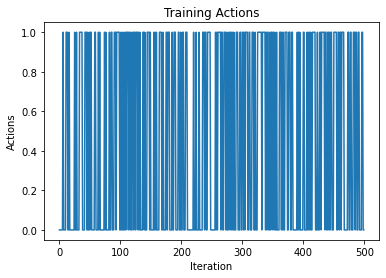

In [40]:
fig, ax = plt.subplots()
ax.plot(actions)
ax.set_xlabel('Iteration')
ax.set_ylabel('Actions')
ax.set_title(f'Training Actions')
plt.show()

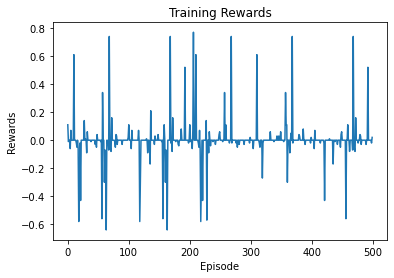

In [41]:
fig, ax = plt.subplots()
ax.plot(rewards)
ax.set_xlabel('Episode')
ax.set_ylabel('Rewards')
ax.set_title(f'Training Rewards')
plt.show()

In [42]:
# Test the RL agent
state = env.reset()
# state = np.reshape(state, [1, env.observation_space.shape[0]])
done = False

while not done:
    action = agent.act(state)
    
    next_state, reward, done, info = env.step(action)
    
#     next_state = np.reshape(next_state, [1, env.observation_space.shape[0]])
    
    # Store in replay buffer
    agent.remember(state, action, reward, next_state, done)
    
    state = next_state
    
    # Display current state and action
    print('Current state:', state)
    print('Action taken:', action)
    
    # End episode if done
    if done:
        print('Final state:', state)
        
    # Train RL agent on replay buffer
#     if len(agent.memory) > agent.batch_size:
#         train_dqn(agent, agent.batch_size)

[[ 1.11670000e+03]
 [ 1.88000000e+00]
 [-1.71953976e-02]
 [ 5.47000000e-01]
 [ 4.20000000e-03]
 [-9.40000000e-01]
 [ 9.40000000e-01]]
Current state: [[ 1.11642500e+03]
 [ 1.55000000e+00]
 [-4.10469958e-02]
 [ 1.32000000e-01]
 [ 5.20000000e-03]
 [-7.75000000e-01]
 [ 7.75000000e-01]]
Action taken: 1
Current state: [[ 1.11665000e+03]
 [ 1.98000000e+00]
 [ 7.72724405e-02]
 [ 5.47000000e-01]
 [ 5.20000000e-03]
 [-9.90000000e-01]
 [ 9.90000000e-01]]
Action taken: 1
Current state: [[ 1.11667000e+03]
 [ 2.02000000e+00]
 [-9.81275517e-02]
 [ 5.47000000e-01]
 [ 5.20000000e-03]
 [-1.01000000e+00]
 [ 1.01000000e+00]]
Action taken: 0
Current state: [[ 1.11608500e+03]
 [ 8.50000000e-01]
 [ 3.14051451e-02]
 [ 5.47000000e-01]
 [ 8.29236500e-03]
 [-4.25000000e-01]
 [ 4.25000000e-01]]
Action taken: 1
Current state: [[ 1.11611500e+03]
 [ 7.90000000e-01]
 [-7.61908203e-02]
 [ 7.60000000e-03]
 [ 8.29236500e-03]
 [-3.95000000e-01]
 [ 3.95000000e-01]]
Action taken: 0
Current state: [[ 1.11608000e+03]
 [ 8.60

Current state: [[ 1.11681500e+03]
 [ 4.10000000e-01]
 [-1.36755462e-02]
 [ 5.47000000e-01]
 [ 7.42950000e-05]
 [-2.05000000e-01]
 [ 2.05000000e-01]]
Action taken: 1
Current state: [[ 1.11771000e+03]
 [ 2.88000000e+00]
 [-7.28361187e-02]
 [ 2.22000000e-02]
 [ 1.30000000e-02]
 [-1.44000000e+00]
 [ 1.44000000e+00]]
Action taken: 1
Current state: [[ 1.11754500e+03]
 [ 2.77000000e+00]
 [-2.69871075e-02]
 [ 2.22000000e-02]
 [ 2.07000000e-02]
 [-1.38500000e+00]
 [ 1.38500000e+00]]
Action taken: 1
Current state: [[ 1.1173850e+03]
 [ 2.6700000e+00]
 [-1.0180971e-01]
 [ 6.6000000e-03]
 [ 4.9780000e-01]
 [-1.3350000e+00]
 [ 1.3350000e+00]]
Action taken: 0
Current state: [[ 1.11785500e+03]
 [ 3.01000000e+00]
 [-4.09451546e-02]
 [ 3.79900000e-01]
 [ 5.20000000e-03]
 [-1.50500000e+00]
 [ 1.50500000e+00]]
Action taken: 0
Current state: [[ 1.11775500e+03]
 [ 2.67000000e+00]
 [-5.56195581e-02]
 [ 6.60000000e-03]
 [ 2.07000000e-02]
 [-1.33500000e+00]
 [ 1.33500000e+00]]
Action taken: 1
Current state: [[

In [14]:
# print(actions)
print(state)

[[ 1.11649000e+03]
 [ 9.00000000e-01]
 [-3.11444474e-02]
 [ 1.80000000e-03]
 [ 7.70000000e-03]
 [-4.50000000e-01]
 [ 4.50000000e-01]]


In [ ]:
# bids_px = [f'bid_{i}_px' for i in range(20)]
# bids_qty = [f'bid_{i}_qty' for i in range(20)]
# asks_px = [f'ask_{i}_px' for i in range(20)]
# asks_qty = [f'ask_{i}_qty' for i in range(20)]
# bids = []
# asks = []
# final = []

# for (i, j) in zip(bids_px, bids_px):
#     bids.append([i, j])

# for (i, j) in zip(asks_px, asks_px):
#     asks.append([i, j])
    
# for (i, j) in zip(bids, asks):
#     final.append([i, j])

# final = np.array(final)

# final = final.flatten()

# data = pd.DataFrame(state).T
 
# data.columns = final

In [ ]:
# data.head()